# Feature Selection Examples

In [1]:
# widen the screen
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

# change the path and loading class
import os, sys
import pandas as pd
import numpy as np
import seaborn as sns
module_path = os.path.abspath(os.path.join("../"))
if module_path not in sys.path:
    sys.path.append(module_path)

In [2]:
from slickml.feature_selection import XGBoostFeatureSelector

# XGBoostFeatureSelector

## Example 1

In [3]:
# loading data
df = pd.read_csv("../data/hypertensive_patients_clf.csv")
df.head()

,LVIDD,LVIDS,LA,EF,MWS,CWS,CLASS
0,5.7,4.7,3.7,58.0,249.30,456.47,0
1,7.7,6.6,4.1,20.0,260.92,443.43,1
2,6.2,4.3,4.6,59.0,255.63,478.96,1
3,5.7,4.4,3.8,49.0,195.28,381.94,0
4,9.1,4.7,4.6,17.0,259.55,395.67,1


In [4]:
# define X, y
y = df.CLASS.values
X = df.drop(["CLASS"], axis=1)

In [5]:
# setup feature selector object
params={"eval_metric" : "auc",
        "learning_rate" : 0.05,
        "max_depth": 2,
        "min_child_weight" : 1,
        "gamma" : 0.0}

xfs = XGBoostFeatureSelector(X, y, n_iter=4, params=params)

In [6]:
# run feature selection
xfs.run()

*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-* Iteration 1 *-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
*-*-*-*-*-*-*-*-*-*-*-* Fold = 1/4 -- Train AUC = 0.929 -- Test AUC = 0.836 *-*-*-*-*-*-*-*-*-*-*-*
*-*-*-*-*-*-*-*-*-*-*-* Fold = 2/4 -- Train AUC = 0.934 -- Test AUC = 0.826 *-*-*-*-*-*-*-*-*-*-*-*
*-*-*-*-*-*-*-*-*-*-*-* Fold = 3/4 -- Train AUC = 0.923 -- Test AUC = 0.906 *-*-*-*-*-*-*-*-*-*-*-*
*-*-*-*-*-*-*-*-*-*-*-* Fold = 4/4 -- Train AUC = 0.937 -- Test AUC = 0.833 *-*-*-*-*-*-*-*-*-*-*-*
*-*-* Internal 4-Folds CV: -*-*- Train AUC = 0.941 +/- 0.004 -*-*- Test AUC = 0.852 +/- 0.015 *-*-*
*-*-* External 4-Folds CV: -*-*- Train AUC = 0.931 +/- 0.005 -*-*- Test AUC = 0.850 +/- 0.032 *-*-*

*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-* Iteration 2 *-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
*-*-*-*-*-*-*-*-*-*-*-* Fold = 1/4 -- Train AUC = 0.918 -- Test AUC = 0.860 *-*-*-*-*-*-*-*-*-*-*-*
*-*-*-*-*-*-*-*-*-*-*-* Fold = 2/4 -- Train AUC = 0.935 -- Test AUC = 0.874 *-*-*-*-*-*-*-*-*-*-*-*

In [7]:
# get feature freq
# or xfs.feature_frequency_ 
xfs.get_feature_frequency()

,Feature,Frequency,Frequency (%)
0,CWS,16.0,100.00
1,LVIDD,16.0,100.00
2,LVIDS,16.0,100.00
3,MWS,16.0,100.00
4,LA,13.0,81.25
5,EF,3.0,18.75


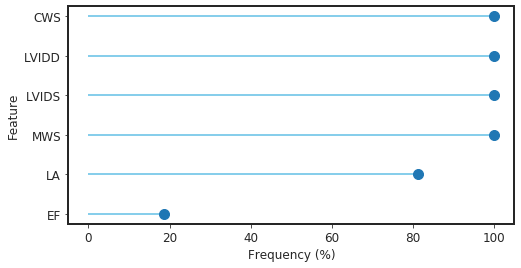

In [8]:
xfs.plot_frequency()

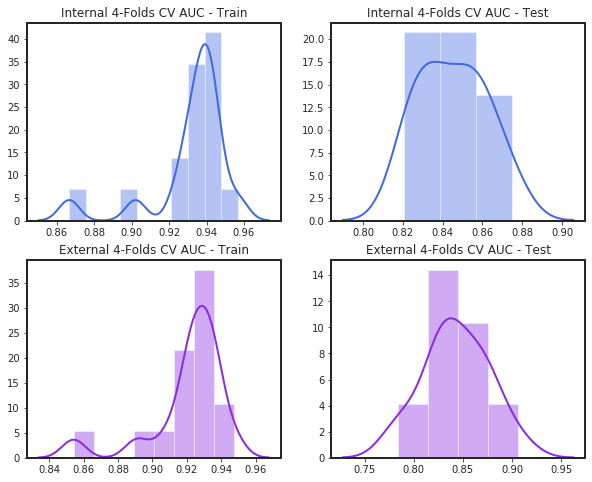

In [9]:
xfs.plot_cv_results()

In [10]:
# getting feature importance for each model
# or imps = xfs.feature_importance_
imps = xfs.get_bst_feature_importance()
for key, val in imps.items():
    print(F"--- {key} ---")
    display(imps[key].head(5))

--- bst_iter1_fold1 ---


,feature,total_gain
0,LVIDD,848.890786
1,CWS,464.927764
2,LVIDS,340.022567
3,MWS,291.031334
4,LA,77.224888


--- bst_iter1_fold2 ---


,feature,total_gain
0,LVIDD,1019.154560
1,CWS,460.276461
2,LVIDS,410.280878
3,MWS,269.946970
4,noisy_EF,88.573590


--- bst_iter1_fold3 ---


,feature,total_gain
0,LVIDD,931.355906
1,CWS,442.526831
2,LVIDS,298.036228
3,MWS,283.651314
4,LA,52.402905


--- bst_iter1_fold4 ---


,feature,total_gain
0,LVIDD,949.054845
1,CWS,643.124486
2,LVIDS,339.711300
3,MWS,203.826883
4,LA,149.798188


--- bst_iter2_fold1 ---


,feature,total_gain
0,LVIDD,756.907810
1,CWS,455.236496
2,LVIDS,283.091866
3,MWS,197.914370
4,LA,39.327658


--- bst_iter2_fold2 ---


,feature,total_gain
0,LVIDD,782.958552
1,LVIDS,375.976463
2,CWS,367.191337
3,MWS,328.392649
4,LA,134.776531


--- bst_iter2_fold3 ---


,feature,total_gain
0,LVIDD,1171.111478
1,CWS,520.026925
2,LVIDS,376.577674
3,MWS,317.294273
4,LA,52.748300


--- bst_iter2_fold4 ---


,feature,total_gain
0,LVIDD,868.979814
1,CWS,413.774690
2,LVIDS,276.586677
3,MWS,252.686966
4,noisy_MWS,51.710637


--- bst_iter3_fold1 ---


,feature,total_gain
0,LVIDD,939.135108
1,CWS,822.818343
2,LVIDS,278.213139
3,MWS,160.811484
4,LA,74.261048


--- bst_iter3_fold2 ---


,feature,total_gain
0,LVIDD,723.506578
1,LVIDS,278.702467
2,CWS,232.915988
3,MWS,169.315446
4,LA,59.154142


--- bst_iter3_fold3 ---


,feature,total_gain
0,LVIDD,858.596503
1,MWS,466.486348
2,CWS,335.912011
3,LVIDS,315.461856
4,LA,14.802910


--- bst_iter3_fold4 ---


,feature,total_gain
0,LVIDD,471.537064
1,CWS,222.162107
2,MWS,137.448887
3,LVIDS,87.596352
4,LA,7.178787


--- bst_iter4_fold1 ---


,feature,total_gain
0,LVIDD,879.543783
1,MWS,441.650384
2,LVIDS,335.236739
3,CWS,303.170103
4,LA,80.038845


--- bst_iter4_fold2 ---


,feature,total_gain
0,LVIDD,973.576141
1,CWS,638.150715
2,LVIDS,235.519563
3,MWS,216.898467
4,LA,100.375051


--- bst_iter4_fold3 ---


,feature,total_gain
0,LVIDD,945.157294
1,CWS,494.422609
2,MWS,261.578358
3,LVIDS,203.888573
4,EF,4.179382


--- bst_iter4_fold4 ---


,feature,total_gain
0,LVIDD,802.306549
1,LVIDS,410.388713
2,CWS,320.825332
3,MWS,203.252508
4,LA,90.109855


In [11]:
# get cv results
# or xfs.cv_results_ 
xfs.get_cv_results()

,int_cv_train,int_cv_test,ext_cv_train,ext_cv_test
0,0.938551,0.845518,0.929062,0.836303
1,0.942978,0.870445,0.933774,0.826083
2,0.936668,0.831651,0.923304,0.905767
3,0.946995,0.859594,0.937257,0.832525
4,0.929796,0.842012,0.917812,0.860238
5,0.942211,0.828253,0.934678,0.873777
6,0.957021,0.874884,0.947256,0.787535
7,0.936404,0.824035,0.924914,0.874483
8,0.941885,0.859411,0.932803,0.830363
9,0.902006,0.834991,0.890992,0.784504
